In [1]:
import pandas as pd
import numpy as np
import talib as ta
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime
import graphviz

In [2]:
df=pd.read_csv("C:\\Users\\Asus\\Desktop\\UM Master Data Science\\Data mining\\Extraction\\MXSC Historical Data.csv")
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
81,"Jan 08, 2019",5.64,5.67,5.73,5.53,3.61M,-0.35%
82,"Jan 07, 2019",5.66,5.52,5.66,5.49,1.70M,2.35%
83,"Jan 04, 2019",5.53,5.40,5.53,5.40,1.48M,1.47%
84,"Jan 03, 2019",5.45,5.42,5.47,5.35,1.24M,0.93%
85,"Jan 02, 2019",5.40,5.37,5.43,5.31,1.11M,0.93%


In [3]:
df['Date']=pd.to_datetime(df['Date'],format='%b %d, %Y')
df=df.sort_values(by=['Date'])
df['weekdays']=df['Date'].dt.weekday
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,weekdays
85,2019-01-02,5.40,5.37,5.43,5.31,1.11M,0.93%,2
84,2019-01-03,5.45,5.42,5.47,5.35,1.24M,0.93%,3
83,2019-01-04,5.53,5.40,5.53,5.40,1.48M,1.47%,4
82,2019-01-07,5.66,5.52,5.66,5.49,1.70M,2.35%,0
81,2019-01-08,5.64,5.67,5.73,5.53,3.61M,-0.35%,1


In [4]:
df['exp20']=df['Price'].ewm(span=20, adjust=False).mean()
df['exp50']=df['Price'].ewm(span=50, adjust=False).mean()



In [5]:
df['EMA5'] = ta.EMA(df['Price'].values, timeperiod=5)
df['EMA10'] = ta.EMA(df['Price'].values, timeperiod=10)
df['ATR'] = ta.ATR(df['High'].values, df['Low'].values, df['Price'].values, timeperiod=4)
df['ADX'] = ta.ADX(df['High'].values, df['Low'].values, df['Price'].values, timeperiod=4)
df['APO']=ta.APO(df['Price'],fastperiod=6,slowperiod=13)
df['BOP']=ta.BOP(df['Open'],df['High'],df['Low'],df['Price'])
df['CCI']=ta.CCI(df['High'],df['Low'],df['Price'],timeperiod=7)
df['RSI'] = ta.RSI(df['Price'].values, timeperiod=14)
macd, macdsignal, macdhist = ta.MACD(df['Price'].values, fastperiod=6, slowperiod=13, signalperiod=3)
df['MACD'] = macd
df['MACDsignal'] = macdsignal
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %,weekdays,exp20,exp50,EMA5,EMA10,ATR,ADX,APO,BOP,CCI,RSI,MACD,MACDsignal
4,2019-05-02,5.31,5.30,5.37,5.30,1.44M,-0.93%,3,5.414758,5.449366,5.354430,5.381687,0.091042,38.956377,-0.047821,0.142857,-71.014493,42.216803,-0.034947,-0.033245
3,2019-05-03,5.32,5.30,5.35,5.29,2.03M,0.19%,4,5.405734,5.444293,5.342953,5.370471,0.083281,40.152369,-0.029359,0.333333,-72.560976,42.985529,-0.035669,-0.034457
2,2019-05-06,5.43,5.31,5.44,5.31,3.12M,2.07%,0,5.408045,5.443733,5.371969,5.381294,0.094961,38.789222,-0.004359,0.923077,94.029851,50.747559,-0.018941,-0.026699
1,2019-05-07,5.47,5.43,5.51,5.40,10.09M,0.74%,1,5.413945,5.444763,5.404646,5.397423,0.098721,43.666690,0.005256,0.363636,149.365629,53.240500,-0.002212,-0.014456
0,2019-05-08,5.52,5.50,5.52,5.41,5.14M,0.91%,2,5.424046,5.447713,5.443097,5.419709,0.101541,47.996219,0.020128,0.181818,125.364182,56.223287,0.015263,0.000404


In [6]:
df['Return'] = df['Price'].pct_change(1).shift(-1)
df['target_cls'] = np.where(df.Return > 0, 1, 0)
df['target_rgs'] = df['Return']
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,weekdays,exp20,exp50,...,ADX,APO,BOP,CCI,RSI,MACD,MACDsignal,Return,target_cls,target_rgs
85,2019-01-02,5.40,5.37,5.43,5.31,1.11M,0.93%,2,5.400000,5.400000,...,NaN,NaN,0.250000,NaN,NaN,NaN,NaN,0.009259,1,0.009259
84,2019-01-03,5.45,5.42,5.47,5.35,1.24M,0.93%,3,5.404762,5.401961,...,NaN,NaN,0.250000,NaN,NaN,NaN,NaN,0.014679,1,0.014679
83,2019-01-04,5.53,5.40,5.53,5.40,1.48M,1.47%,4,5.416689,5.406982,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.023508,1,0.023508
82,2019-01-07,5.66,5.52,5.66,5.49,1.70M,2.35%,0,5.439862,5.416904,...,NaN,NaN,0.823529,NaN,NaN,NaN,NaN,-0.003534,0,-0.003534
81,2019-01-08,5.64,5.67,5.73,5.53,3.61M,-0.35%,1,5.458923,5.425653,...,NaN,NaN,-0.150000,NaN,NaN,NaN,NaN,-0.031915,0,-0.031915


In [7]:
df['Vol.'] = (df['Vol.'].replace(r'[KM]+$', '', regex=True).astype(float) * df['Vol.'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,weekdays,exp20,exp50,...,ADX,APO,BOP,CCI,RSI,MACD,MACDsignal,Return,target_cls,target_rgs
85,2019-01-02,5.40,5.37,5.43,5.31,1110000.0,0.93%,2,5.400000,5.400000,...,NaN,NaN,0.250000,NaN,NaN,NaN,NaN,0.009259,1,0.009259
84,2019-01-03,5.45,5.42,5.47,5.35,1240000.0,0.93%,3,5.404762,5.401961,...,NaN,NaN,0.250000,NaN,NaN,NaN,NaN,0.014679,1,0.014679
83,2019-01-04,5.53,5.40,5.53,5.40,1480000.0,1.47%,4,5.416689,5.406982,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.023508,1,0.023508
82,2019-01-07,5.66,5.52,5.66,5.49,1700000.0,2.35%,0,5.439862,5.416904,...,NaN,NaN,0.823529,NaN,NaN,NaN,NaN,-0.003534,0,-0.003534
81,2019-01-08,5.64,5.67,5.73,5.53,3610000.0,-0.35%,1,5.458923,5.425653,...,NaN,NaN,-0.150000,NaN,NaN,NaN,NaN,-0.031915,0,-0.031915


In [8]:
df=df.drop(['Change %'],axis=1)
df.head()

,Date,Price,Open,High,Low,Vol.,weekdays,exp20,exp50,EMA5,...,ADX,APO,BOP,CCI,RSI,MACD,MACDsignal,Return,target_cls,target_rgs
85,2019-01-02,5.40,5.37,5.43,5.31,1110000.0,2,5.400000,5.400000,NaN,...,NaN,NaN,0.250000,NaN,NaN,NaN,NaN,0.009259,1,0.009259
84,2019-01-03,5.45,5.42,5.47,5.35,1240000.0,3,5.404762,5.401961,NaN,...,NaN,NaN,0.250000,NaN,NaN,NaN,NaN,0.014679,1,0.014679
83,2019-01-04,5.53,5.40,5.53,5.40,1480000.0,4,5.416689,5.406982,NaN,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.023508,1,0.023508
82,2019-01-07,5.66,5.52,5.66,5.49,1700000.0,0,5.439862,5.416904,NaN,...,NaN,NaN,0.823529,NaN,NaN,NaN,NaN,-0.003534,0,-0.003534
81,2019-01-08,5.64,5.67,5.73,5.53,3610000.0,1,5.458923,5.425653,5.536,...,NaN,NaN,-0.150000,NaN,NaN,NaN,NaN,-0.031915,0,-0.031915


In [9]:
X=df.iloc[:,1:-3].fillna(0)
X.head()

,Price,Open,High,Low,Vol.,weekdays,exp20,exp50,EMA5,EMA10,ATR,ADX,APO,BOP,CCI,RSI,MACD,MACDsignal
85,5.40,5.37,5.43,5.31,1110000.0,2,5.400000,5.400000,0.000,0.0,0.000,0.0,0.0,0.250000,0.0,0.0,0.0,0.0
84,5.45,5.42,5.47,5.35,1240000.0,3,5.404762,5.401961,0.000,0.0,0.000,0.0,0.0,0.250000,0.0,0.0,0.0,0.0
83,5.53,5.40,5.53,5.40,1480000.0,4,5.416689,5.406982,0.000,0.0,0.000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0
82,5.66,5.52,5.66,5.49,1700000.0,0,5.439862,5.416904,0.000,0.0,0.000,0.0,0.0,0.823529,0.0,0.0,0.0,0.0
81,5.64,5.67,5.73,5.53,3610000.0,1,5.458923,5.425653,5.536,0.0,0.155,0.0,0.0,-0.150000,0.0,0.0,0.0,0.0


In [10]:
y_cls=df.target_cls
y_rgs=df.target_rgs.fillna(0)
y_cls.head()

85    1
84    1
83    1
82    0
81    0
Name: target_cls, dtype: int32

In [11]:
#df[:-30] #previous
#df[-30:] #after
X_train=X[:-30]
X_test=X[-30:]

In [12]:
y_cls_train=y_cls[:-30]
y_cls_test=y_cls[-30:]

In [13]:
y_rgs_train=y_rgs[:-30]
y_rgs_test=y_rgs[-30:]

In [178]:
#y=y_cls
#X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X, y, test_size=0.3, random_state=432, stratify=y)

In [14]:
print (X_train.shape, y_cls_train.shape)
print (X_test.shape, y_cls_test.shape)

(56, 18) (56,)
(30, 18) (30,)


In [15]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=6)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
clf = clf.fit(X_train, y_cls_train)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

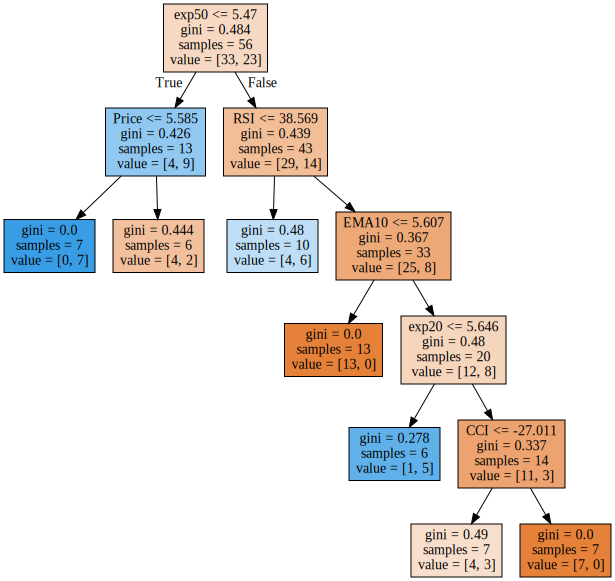

In [17]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,filled=True,feature_names=X_train.columns)
graphviz.Source(dot_data)

In [18]:
y_cls_pred = clf.predict(X_test)

In [19]:
from sklearn.metrics import classification_report
report = classification_report(y_cls_test, y_cls_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.59      0.67        17
           1       0.59      0.77      0.67        13

   micro avg       0.67      0.67      0.67        30
   macro avg       0.68      0.68      0.67        30
weighted avg       0.69      0.67      0.67        30



In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf = RandomForestClassifier(n_estimators=100,max_depth=10)
rf=rf.fit(X_train, y_cls_train)

In [22]:
rf_cls_pred=rf.predict(X_test)
#rf_train_pred=rf.predict(X_train)

In [23]:
rf_cls_pred

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
rf_report = classification_report(y_cls_test, rf_cls_pred)
print(rf_report)

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        17
           1       0.58      0.54      0.56        13

   micro avg       0.63      0.63      0.63        30
   macro avg       0.62      0.62      0.62        30
weighted avg       0.63      0.63      0.63        30

